In [1]:
%matplotlib inline
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import cv2
import matplotlib.pyplot as plt

In [2]:
def f(X):
    return np.sum((X-1)**2)

 The best solution found:                                                                           
 [1.00162179 1.00003288 1.00008639]

 Objective function:
 2.6387614979138397e-06


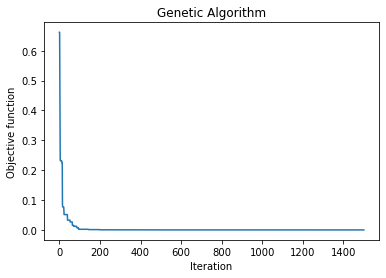

In [3]:
varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound)

model.run()

 The best solution found:                                                                           
 [0. 0. 0.]

 Objective function:
 -3.0


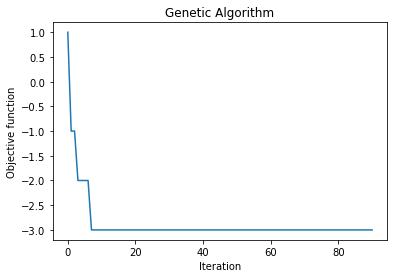

In [4]:
def f(X):
    return np.sum(X-1)


varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='int',variable_boundaries=varbound)

model.run()

 The best solution found:                                                                           
 [1.49991607 5.         1.        ]

 Objective function:
 28.250587542074847


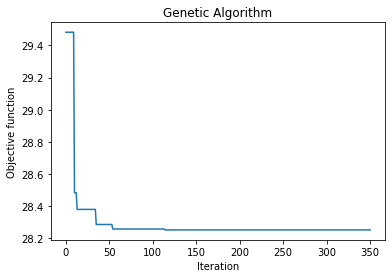

In [5]:
def f(X):
    return np.sum((X-5)**2)

varbound=np.array([[0.5,1.5],[1,100],[0,1]])
vartype=np.array([['real'],['int'],['int']])
model=ga(function=f,dimension=3,variable_type_mixed=vartype,variable_boundaries=varbound)

model.run()

# Loading the base image

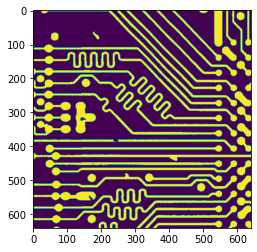

In [6]:
#Loading the figure as a grayscale image
img = cv2.imread('/home/lior/EDA/PCBData/group90100/90100/90100051_test.jpg',cv2.IMREAD_GRAYSCALE) 
# plt.imshow(img)
retval, bw_img = cv2.threshold(img, 150, 1, cv2.THRESH_BINARY_INV)
plt.imshow(bw_img)
plt.show()

In [7]:
def totalimage(img,mask,res=0):
    total=np.zeros((640,640,3), dtype=int)
    total[:,:,0]=bw_img*255
    total[:,:,1]=mask*255
    total[:,:,2]=res*255
    return total

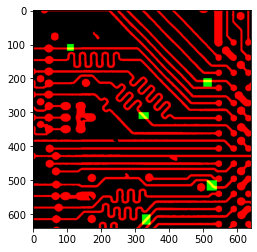

In [8]:
mask = bw_img*0
mask[100:120,100:120]=1
mask[500:530,510:540]=1
mask[200:225,500:525]=1
mask[300:320,310:340]=1
mask[600:630,320:345]=1
plt.imshow(mask)
total = totalimage(img,mask)
plt.imshow(total)
plt.show()

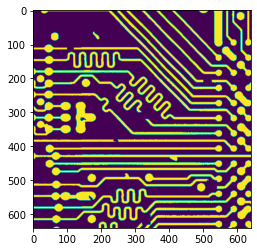

In [9]:
bw_red=bw_img-bw_img*mask
plt.imshow(bw_red)
plt.show()

In [10]:
def cost_func(X):
    x=int(X[0])
    y=int(X[1])
    w=int(X[2])
    h=int(X[3])
    cost_bw=sum(sum(bw_red[(x-w):(x+w),(y-h):(y+h)]))
    cost_mask=sum(sum(mask[(x-w):(x+w),(y-h):(y+h)]))
    if cost_bw>0:
        return cost_bw
    else:
        return -cost_mask

In [ ]:
varbound=np.array([[40,600],[40,600],[5,40],[5,40]])
model=ga(function=cost_func,dimension=4,variable_type='int',variable_boundaries=varbound)
model.run()

||||||||||||||||||||||||||||||||||||||||||||||____ 91.9% GA is running...

In [40]:
X_best=model.best_variable

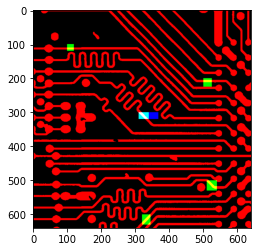

In [51]:
res = bw_img*0
x=int(X_best[0])
y=int(X_best[1])
w=int(X_best[2])
h=int(X_best[3])
res[(x-w):(x+w),(y-h):(y+h)]=1
total_res = totalimage(img,mask,res)
plt.imshow(total_res)
plt.show()

In [11]:
model.best_function

-288000.0

In [43]:
c,v,b,m = X_best


In [44]:
c

310.0

In [45]:
v

339.0

In [46]:
b

10.0

In [47]:
m

29.0

# path mask

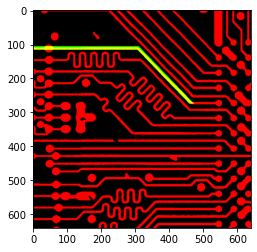

In [6]:
path_mask = bw_img*0
for i in range(640):
    for j in range(640):
        if (i>105 and i<117 and j<310):
            path_mask[i,j]=1
        if (i-1.04*j>-217 and i-1.04*j<-202 and i>105 and i<275):
            path_mask[i,j]=1

total_res = totalimage(img,path_mask)

plt.imshow(total_res)
plt.show()

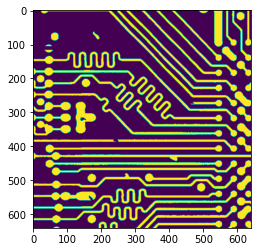

In [7]:
bw_red_path=bw_img-bw_img*path_mask
plt.imshow(bw_red_path)
plt.show()

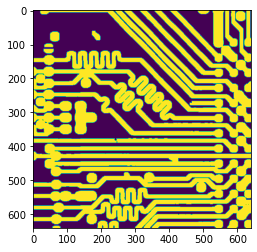

In [10]:
kernel = np.ones((7,7), np.uint8)  # note this is a horizontal kernel
d_im = cv2.dilate(bw_red_path, kernel, iterations=1)
plt.imshow(d_im)
plt.show()

In [15]:
def cost_func_path(X):
    x=int(X[0])
    y=int(X[1])
    w=int(X[2])
    h=int(X[3])
    cost_bw=sum(sum(d_im[(x-w):(x+w),(y-h):(y+h)]))
    cost_mask=sum(sum(path_mask[(x-w):(x+w),(y-h):(y+h)]))
    if cost_bw>0:
        return cost_bw
    else:
        return -cost_mask +h*w

 The best solution found:                                                                           
 [ 89. 110.  31.  32.]

 Objective function:
 1.0


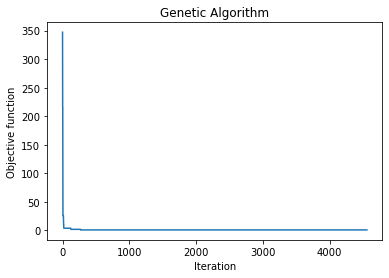

In [16]:
varbound=np.array([[40,600],[40,600],[30,40],[30,40]])
model=ga(function=cost_func_path,dimension=4,variable_type='int',variable_boundaries=varbound)
model.run()

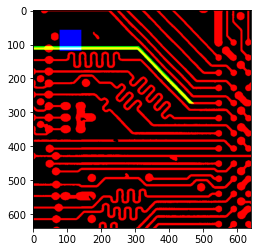

In [17]:
X_best=model.best_variable
res = bw_img*0
x=int(X_best[0])
y=int(X_best[1])
w=int(X_best[2])
h=int(X_best[3])
res[(x-w):(x+w),(y-h):(y+h)]=1
total_res = totalimage(img,path_mask,res)
plt.imshow(total_res)
plt.show()

In [14]:
X_best


array([ 80., 127.,  39.,  40.])

In [27]:
model.


1